In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

from src.code.simulation.galton_watson import GaltonWatson
from src.code.simulation.utils import plot_zn_distribution, test_loi_exponentielle
from src.config.config import seed
from src.utils.utils import init_notebook

In [2]:
init_notebook(seed)

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [3]:
poisson_1 = stats.poisson(1)

In [4]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [5]:
nb_survivants = gp1.simule(20)

In [6]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 10 époques.


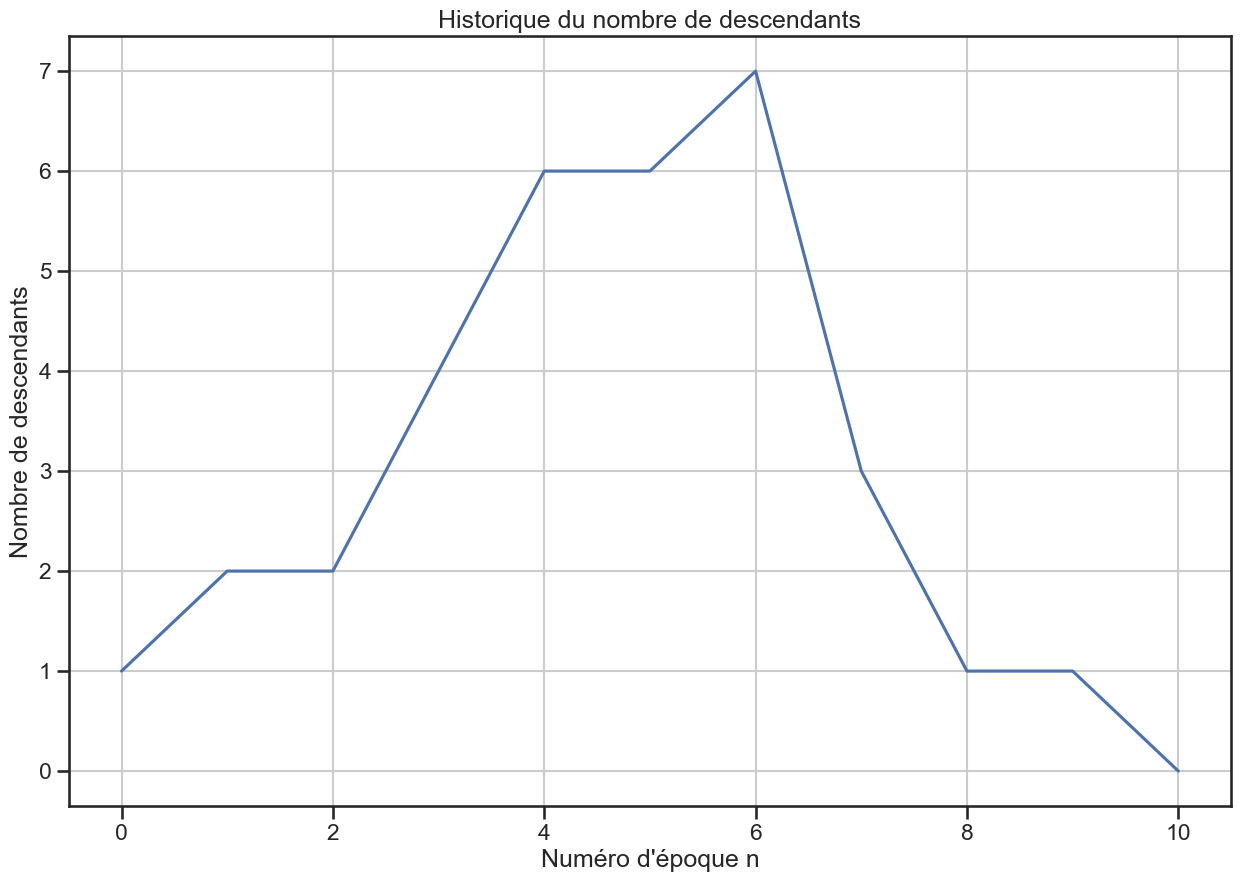

In [19]:
plt.figure(figsize=(15, 10))
gp1.plot_historique_descendants()
plt.savefig("assets/img/number-of-children.png")

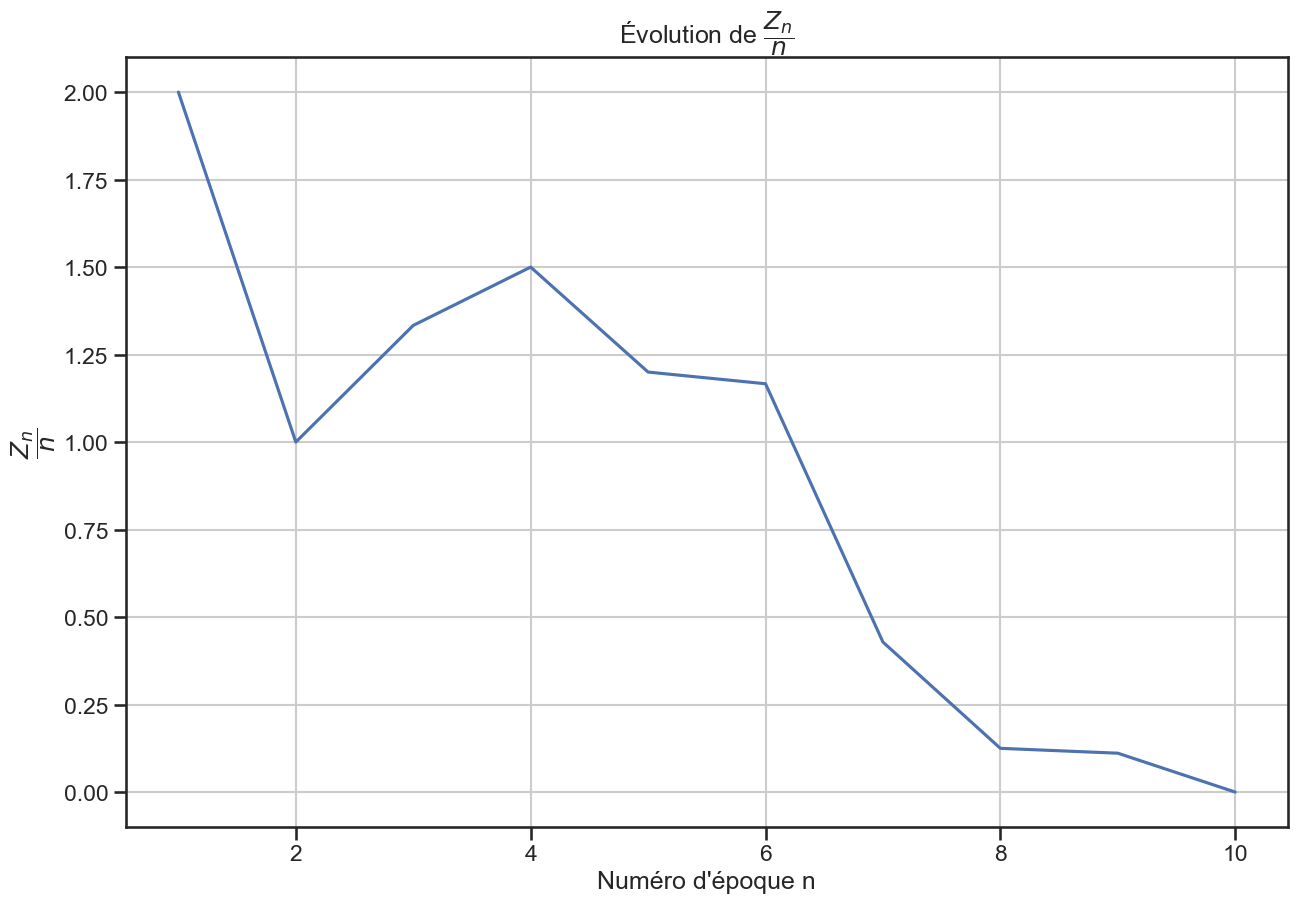

In [20]:
# noinspection JupyterPackage
plt.figure(figsize=(15, 10))
gp1.plot_zn_sur_n()
plt.savefig("assets/img/zn-over-n.png")

#### Arbre de Galton-Watson

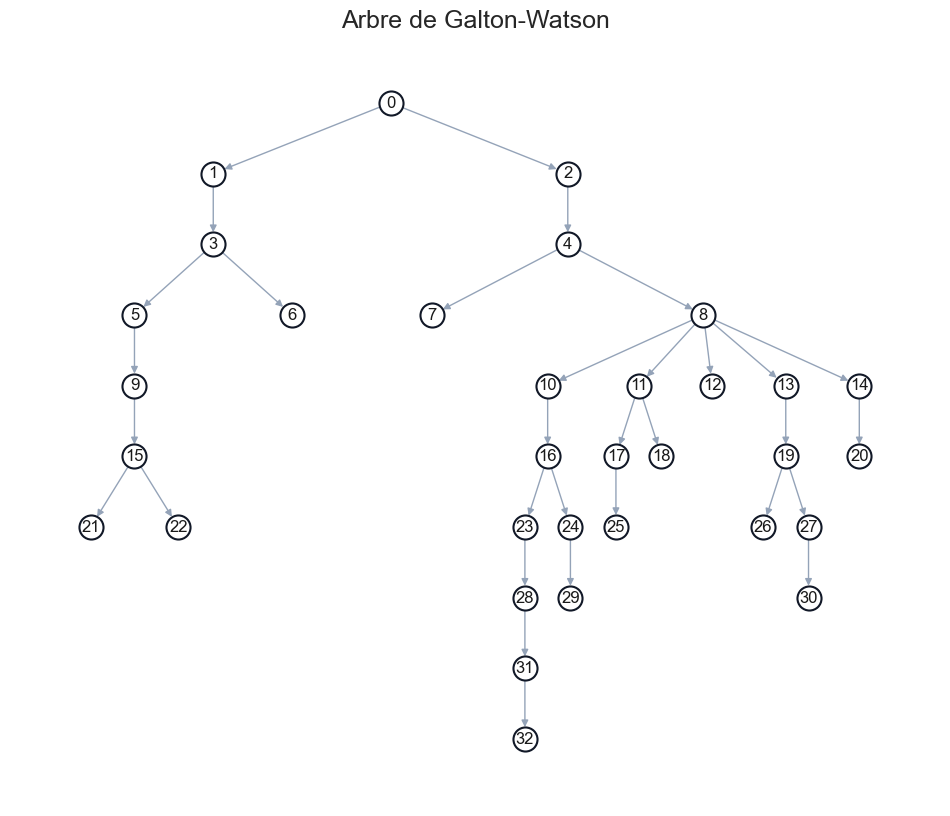

In [17]:
plt.figure(figsize=(12, 10))
gp1.plot_arbre()
plt.savefig("assets/img/galton-watson-tree.png", transparent=True)
plt.savefig("assets/img/galton-watson-tree.svg", transparent=True)

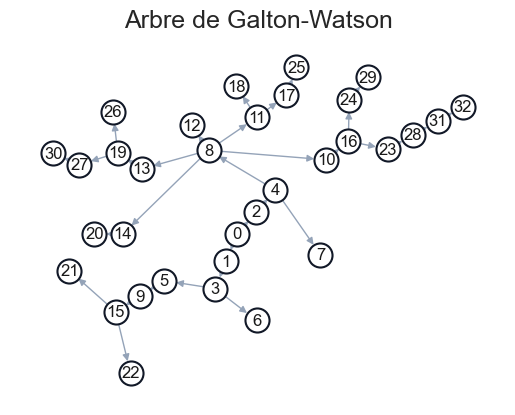

In [16]:
gp1.plot_arbre(circular=True)

### λ = 2

In [10]:
poisson_2 = stats.poisson(2)

In [11]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [12]:
nb_survivants = gp2.simule(20)

In [13]:
print(f"Il reste {nb_survivants} survivants au bout de {gp2.n} époques.")

Il reste 680149 survivants au bout de 20 époques.


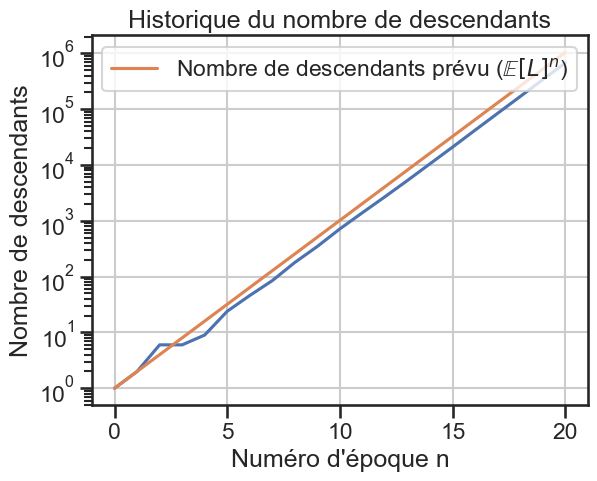

In [14]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

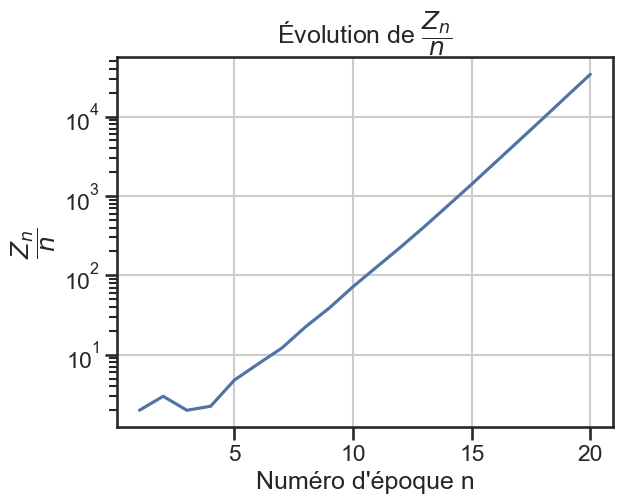

In [15]:
gp2.plot_zn_sur_n(logscale=True)

### Essais $Z_n / n$

In [21]:
nb_simulations = 10_000
nb_epoques = 100

In [22]:
simulations = gp1.lance_simulations(nb_simulations, nb_epoques)
simulations = np.array(simulations)

In [33]:
def plot_zn_distribution(resultats_simulation: list[int], nb_epoques: int) -> None:
    _, ax = plt.subplots(1, 2, figsize=(15, 6))

    ax[0].set_title(f"Distribution des $Z_n$,\n$n = {nb_epoques}$")
    ax[1].set_title(f"Distribution des $Z_n$,\n$n = {nb_epoques}$")

    ax[0].hist(resultats_simulation)
    ax[1].hist(resultats_simulation)

    ax[0].set_xlabel("$Z_n$")
    ax[1].set_xlabel("$Z_n$")

    ax[0].set_ylabel("compte")
    ax[1].set_ylabel("compte (échelle logarithmique)")
    ax[1].set_yscale("log")

    plt.savefig("assets/img/zn-distribution.png")

<Figure size 2500x1000 with 0 Axes>

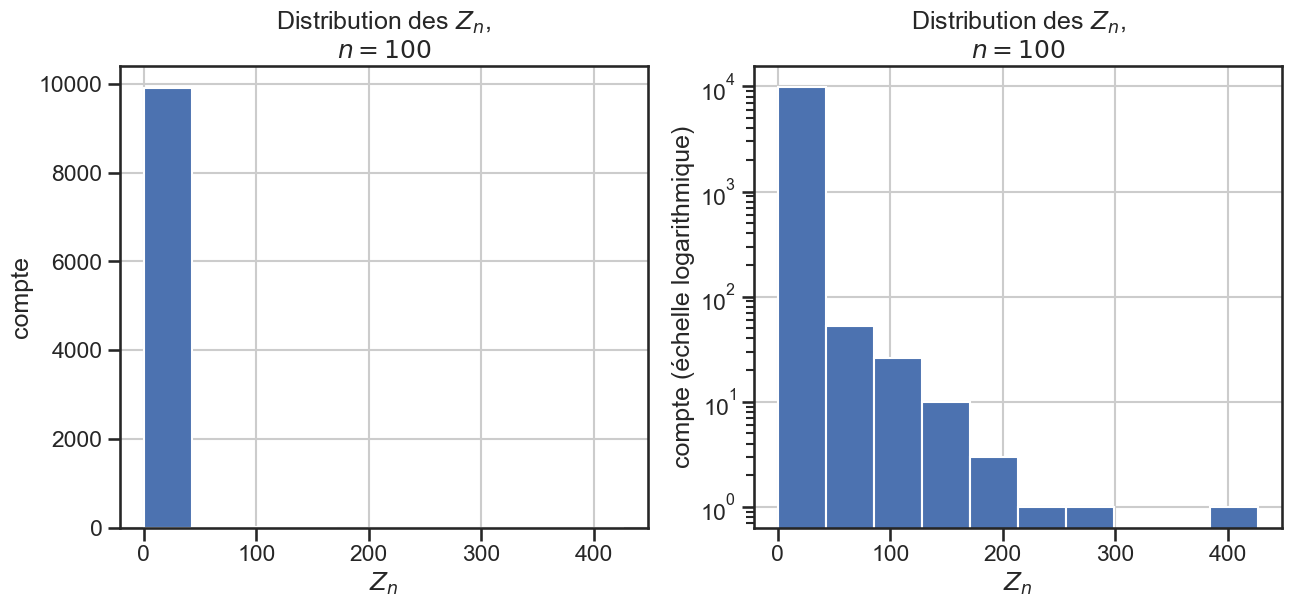

In [34]:
plt.figure(figsize=(25, 10))
plot_zn_distribution(simulations, nb_epoques)

In [19]:
np.sum(simulations > 0)

191

In [36]:
zn_sup_zero = simulations[simulations > 0]

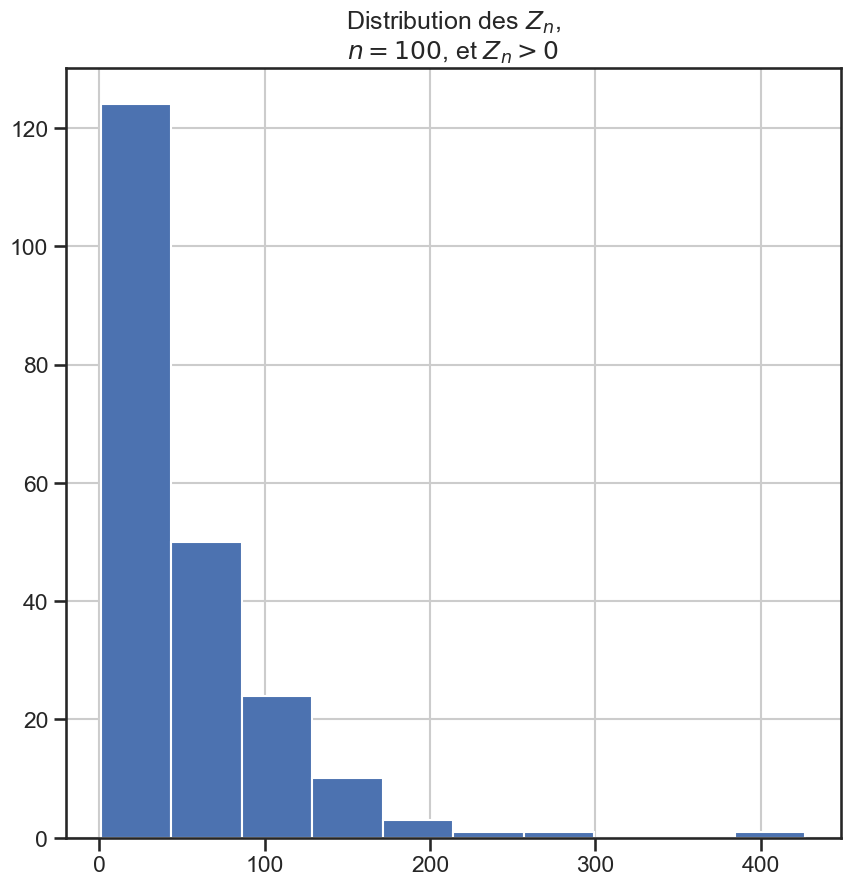

In [47]:
plt.figure(figsize=(10, 10))
plt.title("Distribution des $Z_n$,\n$n = 100$, et $Z_n > 0$")
plt.hist(zn_sup_zero)
plt.savefig("assets/img/zn-sup-zero-distribution.png")

In [40]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.9546949214468399


In [41]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [42]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

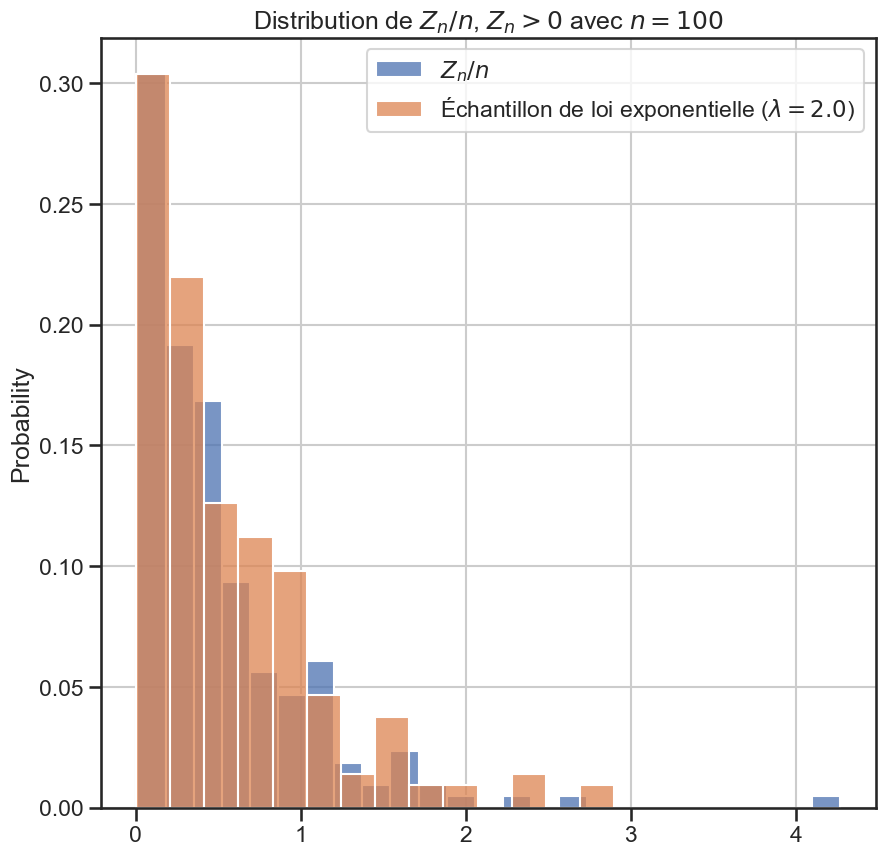

In [46]:
plt.figure(figsize=(10, 10))
plt.title(f"Distribution de $Z_{{n}} / n$, $Z_n > 0$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()

plt.savefig("assets/img/zn-sup-zero-distribution-with-exponential.png")

In [26]:
test_loi_exponentielle(zn_sup_zero / nb_epoques)

(0.531818713902256, 0.057586680541798524)

## Loi uniforme sur {0, 1, 2}

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Uniforme}}(0, 2)$.

In [51]:
uniforme2 = stats.randint(0, 3)

In [52]:
gu2 = GaltonWatson(uniforme2)
gu2

Processus Galton-Watson
- loi de reproduction L : randint
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [53]:
nb_survivants = gu2.simule(100)

In [54]:
print(f"Il reste {nb_survivants} survivants au bout de {gu2.n} époques.")

Il reste 0 survivants au bout de 12 époques.


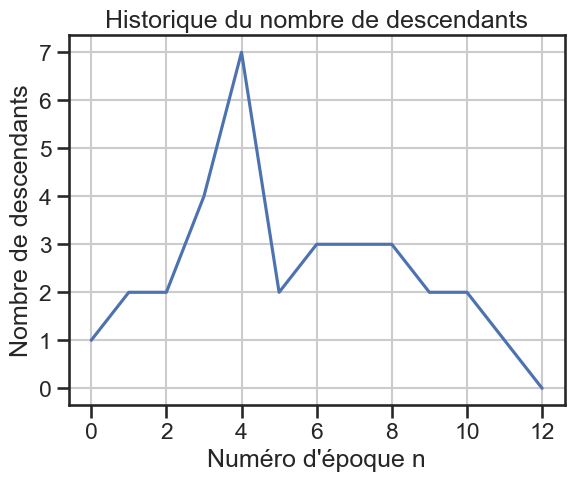

In [55]:
gu2.plot_historique_descendants()

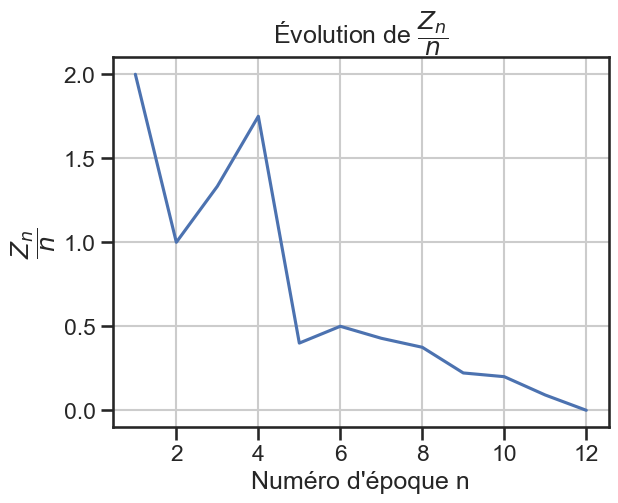

In [56]:
gu2.plot_zn_sur_n()

#### Arbre de Galton-Watson

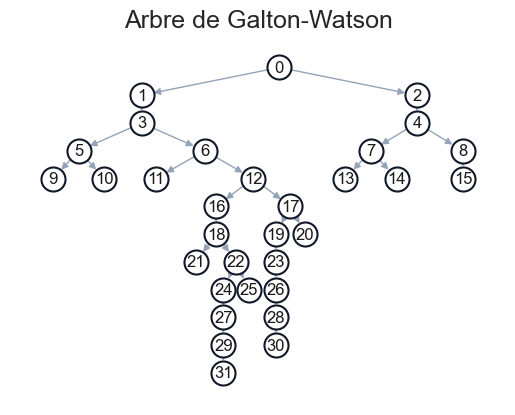

In [57]:
gu2.plot_arbre()

### Essais $Z_n / n$

In [58]:
nb_simulations = 10_000
nb_epoques = 100

simulations = gu2.lance_simulations(nb_simulations, nb_epoques)

In [59]:
simulations = np.array(simulations)

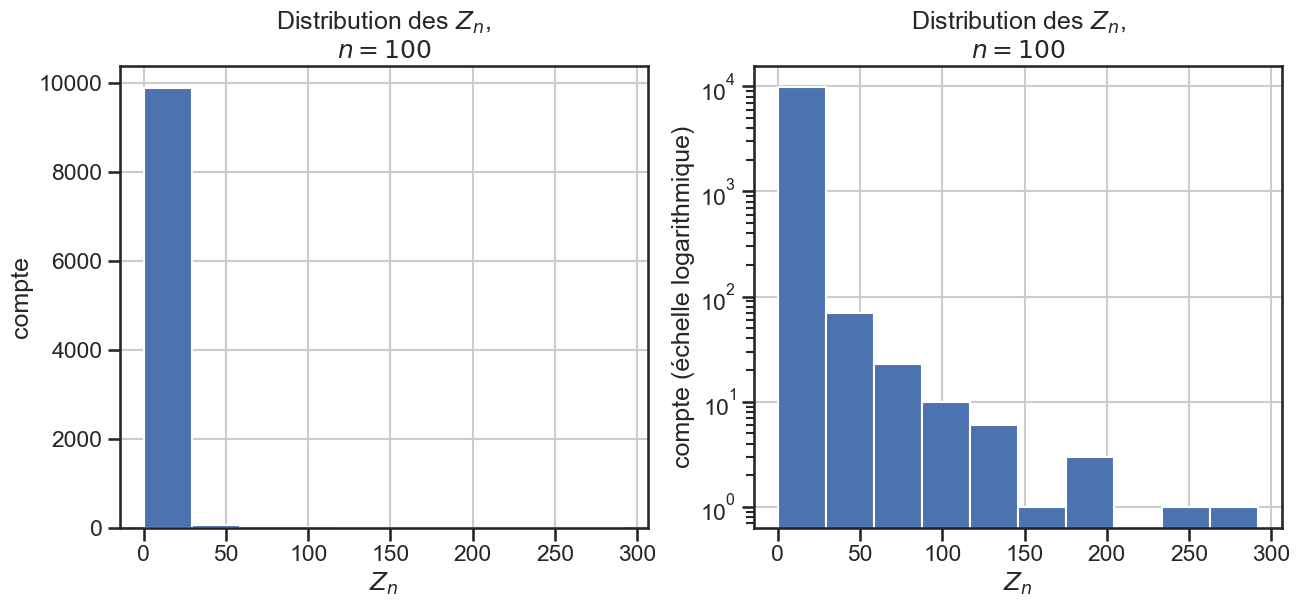

In [60]:
plot_zn_distribution(simulations, nb_epoques)

In [61]:
np.sum(simulations > 0)

267

In [62]:
zn_sup_zero = simulations[simulations > 0]

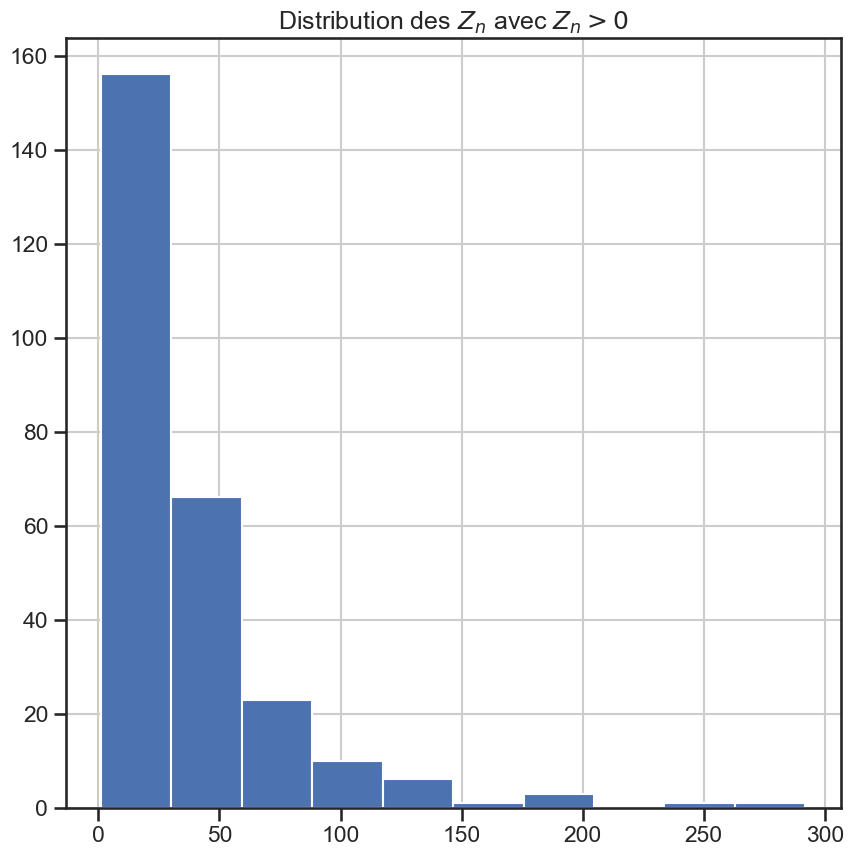

In [68]:
plt.figure(figsize=(10, 10))
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

plt.savefig("assets/img/zn-sup-zero-distribution-uniform.png")

In [64]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.7076361423790694


In [65]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [66]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

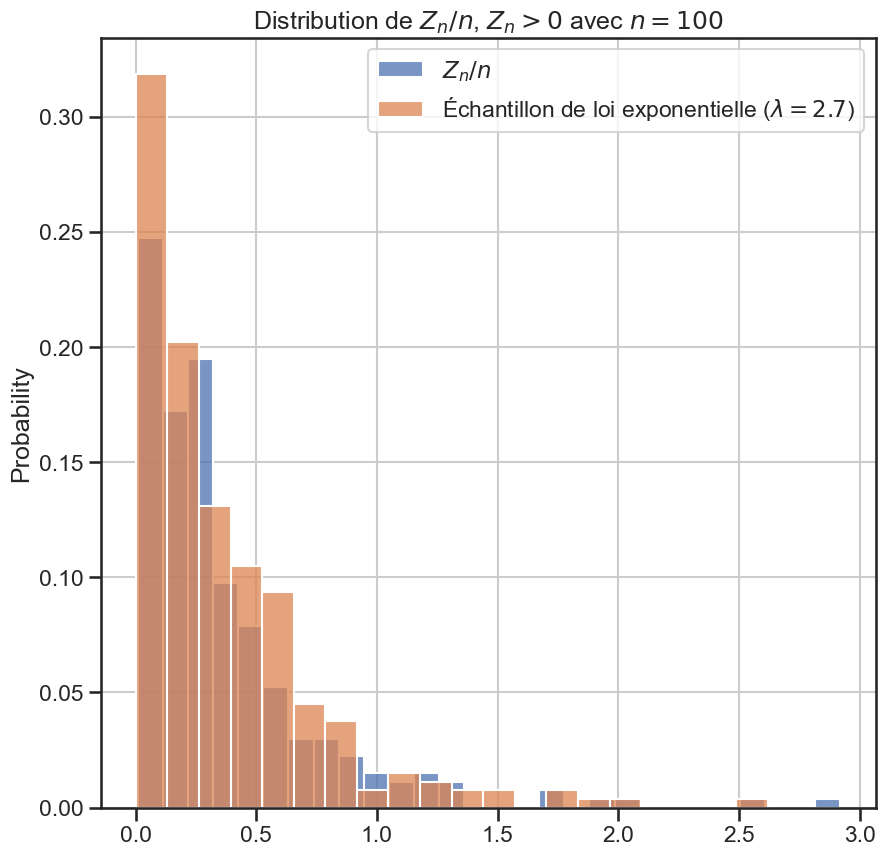

In [69]:
plt.figure(figsize=(10, 10))
plt.title(f"Distribution de $Z_{{n}} / n$, $Z_n > 0$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()
plt.savefig("assets/img/zn-sup-zero-distribution-uniform-with-exponential.png")

In [44]:
p_value, _ = test_loi_exponentielle(zn_sup_zero / nb_epoques)

## Expérimentations

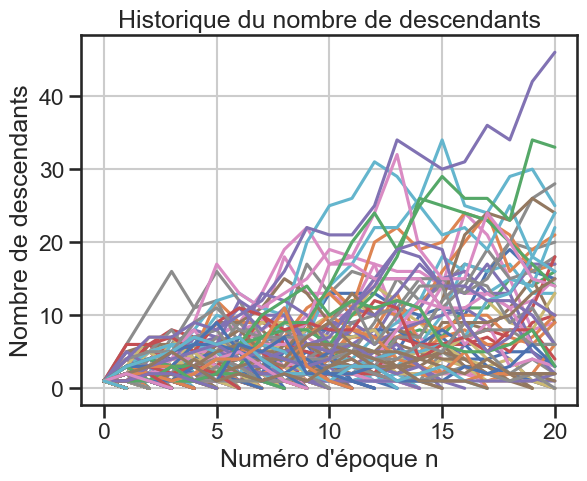

In [45]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_historique_descendants()

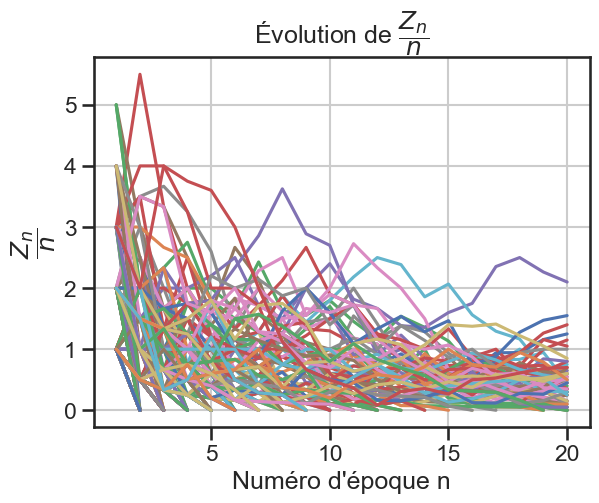

In [46]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_zn_sur_n()